In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import cv2
from PIL import Image
import tensorflow as tf
import keras
import matplotlib as mpl
from IPython.display import Image, display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau

## Dataset Exploration

In [32]:
labels = ['NORMAL', 'PNEUMONIA']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, dsize=(img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.asarray(data, dtype = "object")

In [33]:
train = get_training_data('Data/chest_xray/train/')
test = get_training_data('Data/chest_xray/test/')
val = get_training_data('Data/chest_xray/val/')

OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


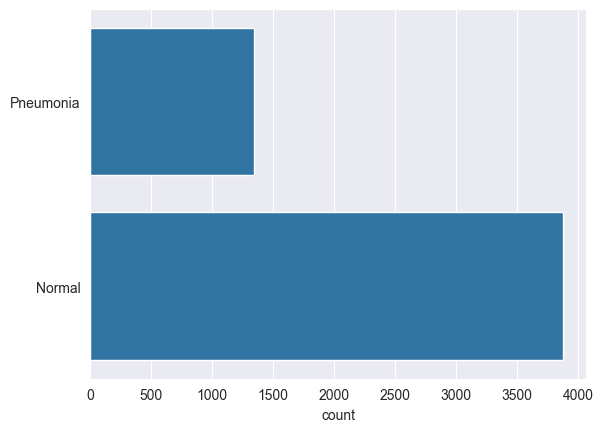

In [34]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)  
plt.show()

Text(0.5, 1.0, 'PNEUMONIA')

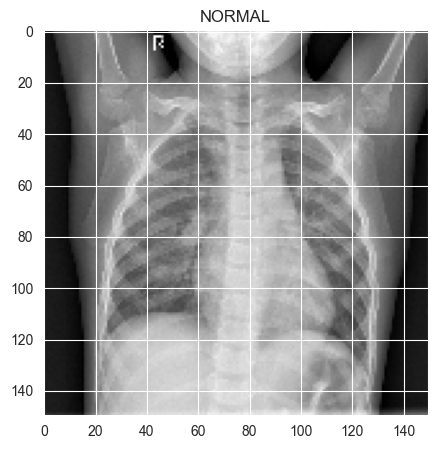

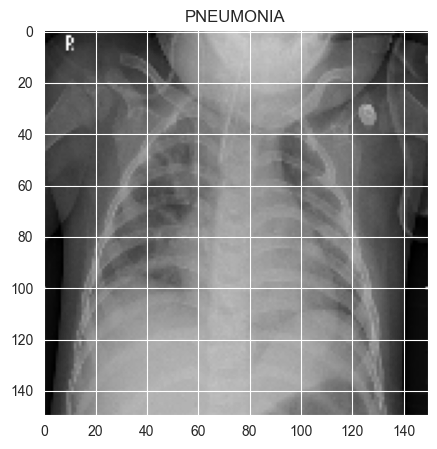

In [35]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [36]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [37]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [38]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)
print("The size of the train set is " + str(x_train.shape))
x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)
print("The size of the validation set is " + str(x_val.shape))
x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
print("The size of the test set is " + str(x_test.shape))

The size of the train set is (5216, 150, 150, 1)
The size of the validation set is (16, 150, 150, 1)
The size of the test set is (624, 150, 150, 1)


## CNN Baseline

In [39]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

def create_model():
    model = Sequential([
    Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
    Dropout(0.1),
BatchNormalization(),
MaxPool2D((2,2) , strides = 2 , padding = 'same'),
Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
BatchNormalization(),
MaxPool2D((2,2) , strides = 2 , padding = 'same'),
Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
Dropout(0.2),
BatchNormalization(),
MaxPool2D((2,2) , strides = 2 , padding = 'same'),
Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
Dropout(0.2),
BatchNormalization(),
MaxPool2D((2,2) , strides = 2 , padding = 'same'),
Flatten(),
Dense(units = 128 , activation = 'relu'),
Dropout(0.2),
Dense(units = 1 , activation = 'sigmoid')
])
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

model = create_model()
model.summary()


C:\Users\popar\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 38, 38, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 38, 38, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [40]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12


C:\Users\popar\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 119s 702ms/step - accuracy: 0.8434 - loss: 0.5786 - val_accuracy: 0.5000 - val_loss: 15.3378 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 110s 672ms/step - accuracy: 0.9206 - loss: 0.2102 - val_accuracy: 0.5000 - val_loss: 10.8576 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.9342 - loss: 0.1736
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 110s 672ms/step - accuracy: 0.9342 - loss: 0.1736 - val_accuracy: 0.5000 - val_loss: 4.6666 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 681ms/step - accuracy: 0.9427 - loss: 0.1497 - val_accuracy: 0.5625 - val_loss: 3.4371 - learning_rate: 3.0000e-04
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 662ms/step - accuracy: 0.9524 - loss: 0.1191 - val_accuracy: 0.5000 - val_loss: 3.3230 - learning_rate: 3.0000e-04
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.

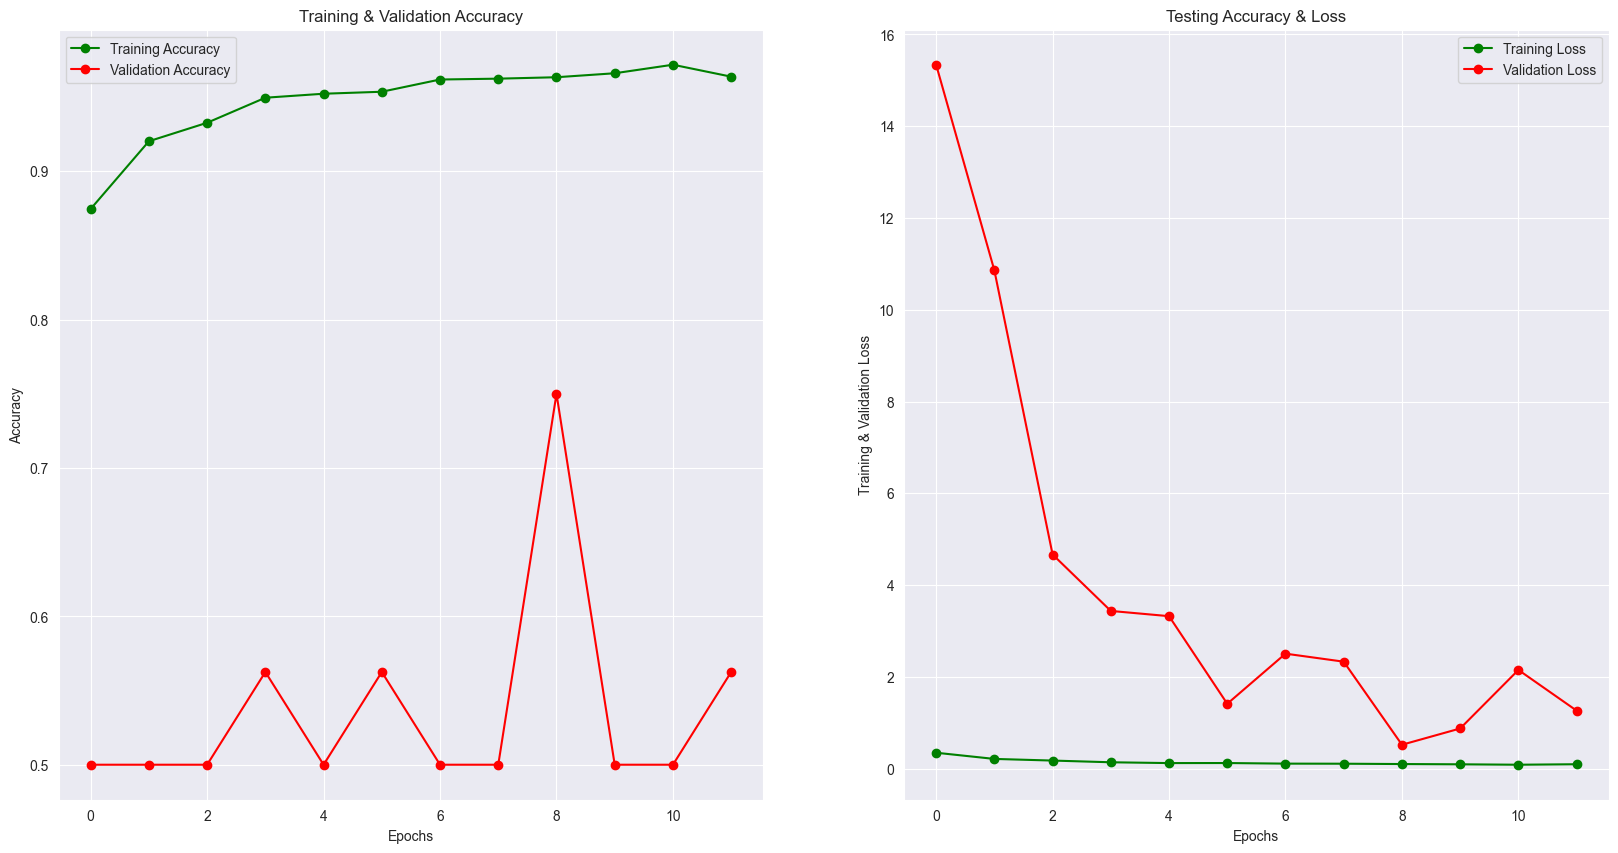

In [41]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

## Performance Evaluation

In [42]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.9146 - loss: 0.2970
Loss of the model is -  0.23188422620296478
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.9146 - loss: 0.2970
Accuracy of the model is -  92.94871687889099 %


In [43]:
preds = model.predict(x_test)
preds = preds.round()
print(classification_report(y_test, preds, target_names=['Pneumonia (0)', 'Normal (1)']))

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step
               precision    recall  f1-score   support

Pneumonia (0)       0.92      0.88      0.90       234
   Normal (1)       0.93      0.96      0.94       390

     accuracy                           0.93       624
    macro avg       0.93      0.92      0.92       624
 weighted avg       0.93      0.93      0.93       624


     0    1
0  207   27
1   17  373


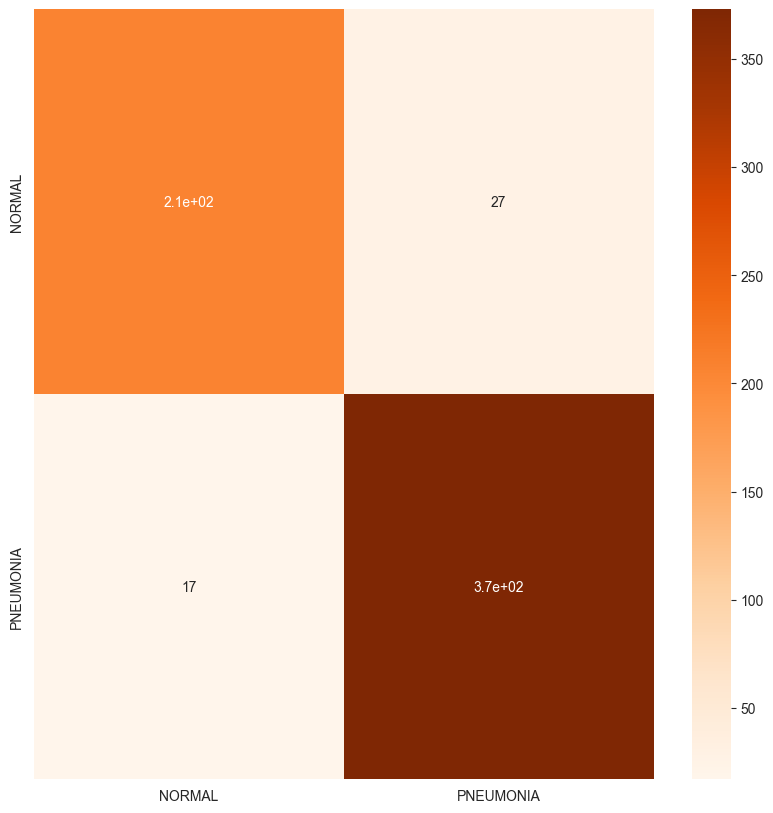

In [44]:
cm = confusion_matrix(y_test, preds)
cm = pd.DataFrame(cm, index = ['0', '1'], columns=['0', '1'])
print(cm)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, cmap="Oranges", linecolor = 'black', annot=True, xticklabels = labels, yticklabels = labels)
plt.show()

## Hyper-Parameter Optimization

In [ ]:
## scuffed grid search
parameters1 = [4, 6, 8, 10, 12, 14]
accuracies = []
matrices = []
for x in parameters1:
    model = create_model()
    history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = x , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])
    preds = model.predict(x_test)
    preds = preds.round()
    cm = confusion_matrix(y_test, preds)
    matrices.append(cm)
    print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")
    accuracies.append(model.evaluate(x_test,y_test)[1]*100)

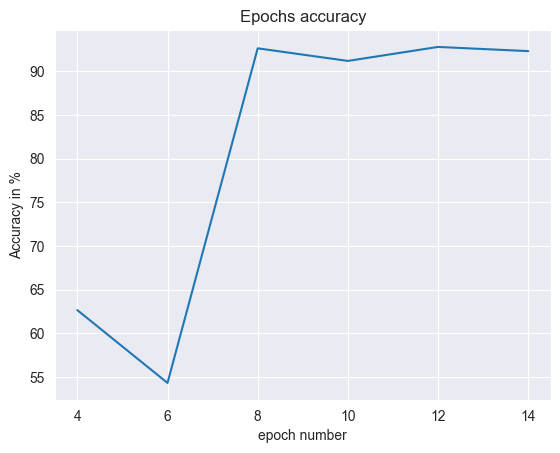

In [48]:
plt.plot(parameters1, accuracies)
plt.title("Epochs accuracy")
plt.xlabel("epoch number")
plt.ylabel("Accuracy in %")
plt.show()

<Axes: >

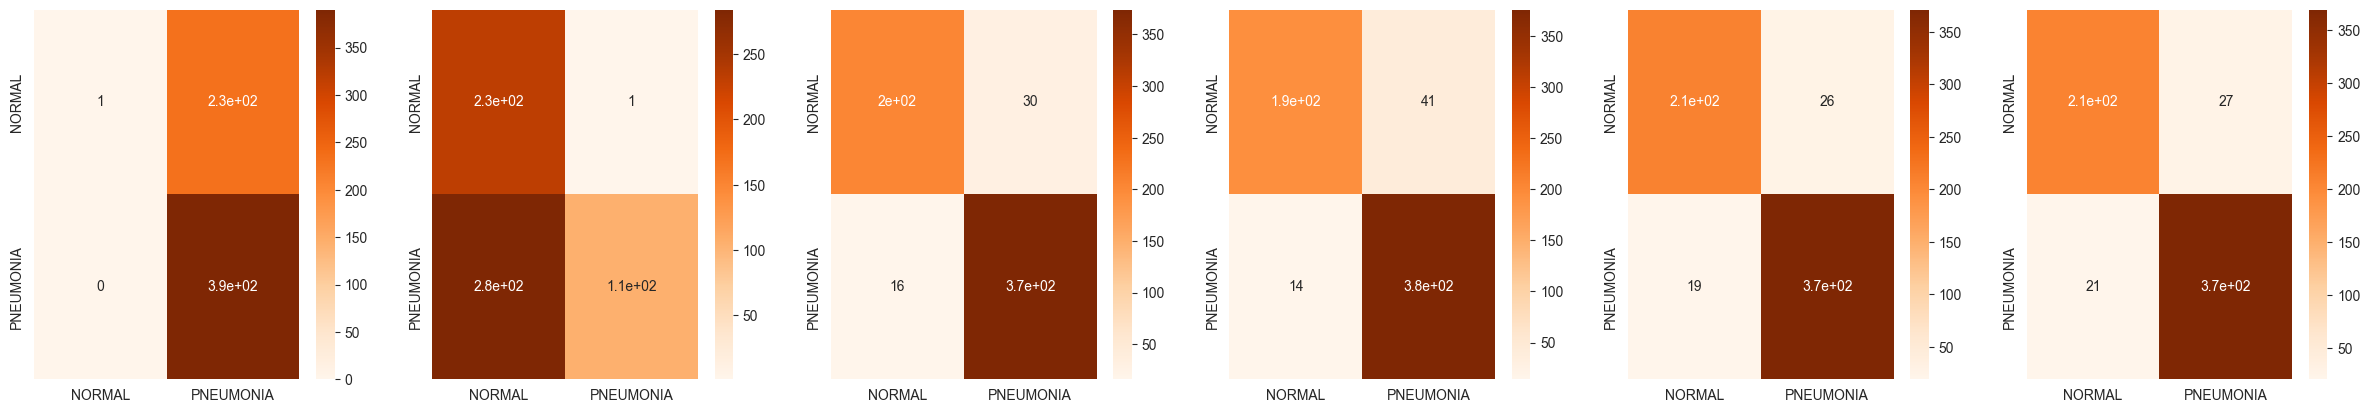

In [47]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6)
fig.set_figwidth(30)
cm1 = pd.DataFrame(matrices[0], index = ['0', '1'], columns=['0', '1'])
cm2 = pd.DataFrame(matrices[1], index = ['0', '1'], columns=['0', '1'])
cm3 = pd.DataFrame(matrices[2], index = ['0', '1'], columns=['0', '1'])
cm4 = pd.DataFrame(matrices[3], index = ['0', '1'], columns=['0', '1'])
cm5 = pd.DataFrame(matrices[4], index = ['0', '1'], columns=['0', '1'])
cm6 = pd.DataFrame(matrices[5], index = ['0', '1'], columns=['0', '1'])
sns.heatmap(cm1, ax=ax1, cmap="Oranges", linecolor = 'black', annot=True, xticklabels = labels, yticklabels = labels)
sns.heatmap(cm2, ax=ax2, cmap="Oranges", linecolor = 'black', annot=True, xticklabels = labels, yticklabels = labels)
sns.heatmap(cm3, ax=ax3, cmap="Oranges", linecolor = 'black', annot=True, xticklabels = labels, yticklabels = labels)
sns.heatmap(cm4, ax=ax4, cmap="Oranges", linecolor = 'black', annot=True, xticklabels = labels, yticklabels = labels)
sns.heatmap(cm5, ax=ax5, cmap="Oranges", linecolor = 'black', annot=True, xticklabels = labels, yticklabels = labels)
sns.heatmap(cm6, ax=ax6, cmap="Oranges", linecolor = 'black', annot=True, xticklabels = labels, yticklabels = labels)

In [49]:
print(accuracies)

[62.66025900840759, 54.326921701431274, 92.62820482254028, 91.18589758872986, 92.78846383094788, 92.30769276618958]


In [60]:
### final train
model = create_model()
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 8 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

C:\Users\popar\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8


C:\Users\popar\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 539ms/step - accuracy: 0.8186 - loss: 0.8126 - val_accuracy: 0.5000 - val_loss: 10.1514 - learning_rate: 0.0010
Epoch 2/8
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 526ms/step - accuracy: 0.9257 - loss: 0.1900 - val_accuracy: 0.5000 - val_loss: 11.8854 - learning_rate: 0.0010
Epoch 3/8
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.9237 - loss: 0.1857
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 518ms/step - accuracy: 0.9237 - loss: 0.1856 - val_accuracy: 0.5000 - val_loss: 10.4378 - learning_rate: 0.0010
Epoch 4/8
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 526ms/step - accuracy: 0.9432 - loss: 0.1402 - val_accuracy: 0.5000 - val_loss: 5.8587 - learning_rate: 3.0000e-04
Epoch 5/8
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.9496 - loss: 0.1395
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 541ms/step - accuracy: 0.9496 - loss: 

In [61]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8841 - loss: 0.4085
Loss of the model is -  0.2785501778125763
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.8841 - loss: 0.4085
Accuracy of the model is -  91.34615659713745 %


In [62]:
preds = model.predict(x_test)
preds = preds.reshape(1, -1)[0]
preds = preds.round()
print(classification_report(y_test, preds, target_names=['Pneumonia (0)', 'Normal (1)']))

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step
               precision    recall  f1-score   support

Pneumonia (0)       0.93      0.83      0.88       234
   Normal (1)       0.90      0.96      0.93       390

     accuracy                           0.91       624
    macro avg       0.92      0.90      0.91       624
 weighted avg       0.91      0.91      0.91       624


<Axes: >

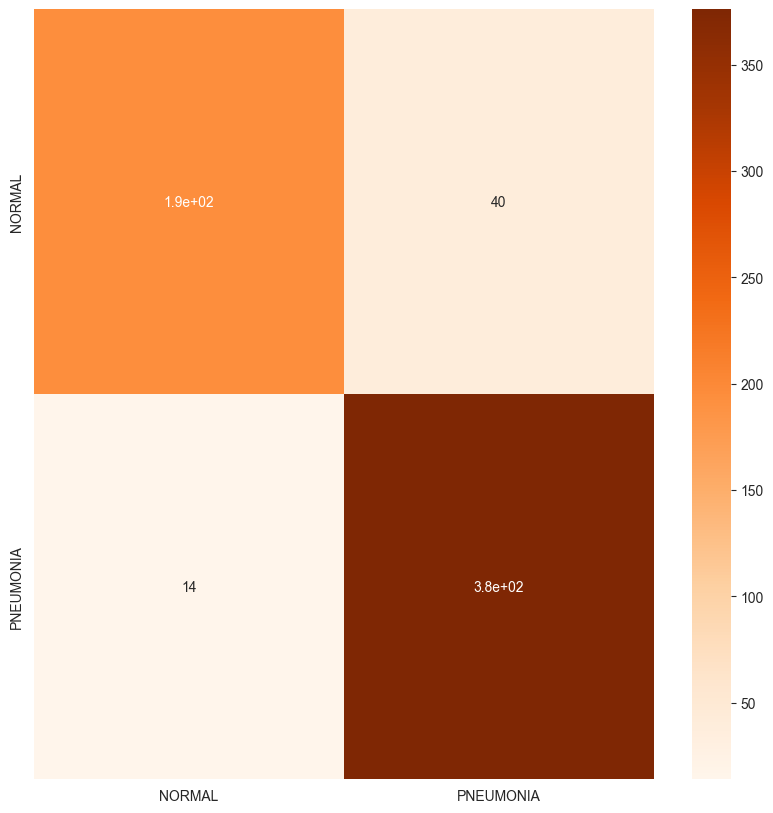

In [63]:
cm = confusion_matrix(y_test, preds)
cm = pd.DataFrame(cm, index = ['0', '1'], columns=['0', '1'])
plt.figure(figsize = (10, 10))
sns.heatmap(cm, cmap="Oranges", linecolor = 'black', annot=True, xticklabels = labels, yticklabels = labels)

## Explainable AI

In [64]:
correct = np.nonzero(preds == y_test)[0]
incorrect = np.nonzero(preds != y_test)[0]

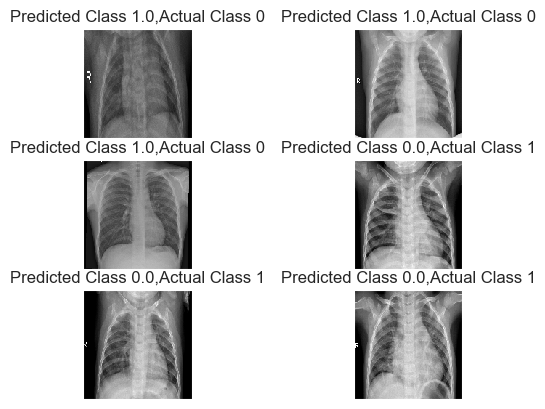

In [65]:
i = 0
for c in incorrect[:3]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(preds[c], y_test[c]))
    i += 1
for c in incorrect[-3:]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(preds[c], y_test[c]))
    i += 1

In [66]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, last_deep_layer, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.get_layer(last_deep_layer).output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [67]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [68]:
### find the last layers we need
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 38, 38, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 38, 38, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 3,737,029 (14.26 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

 Optimizer params: 2,490,628 (9.50 MB)

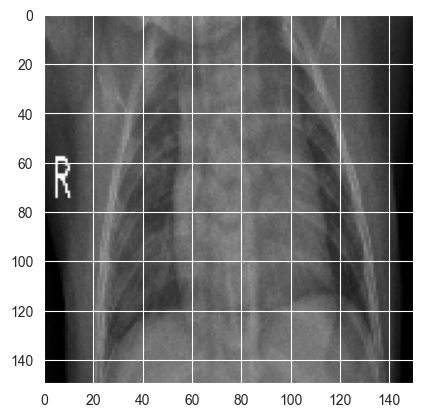

C:\Users\popar\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_230']]
Received: inputs=Tensor(shape=(1, 150, 150, 1))
  warnings.warn(msg)


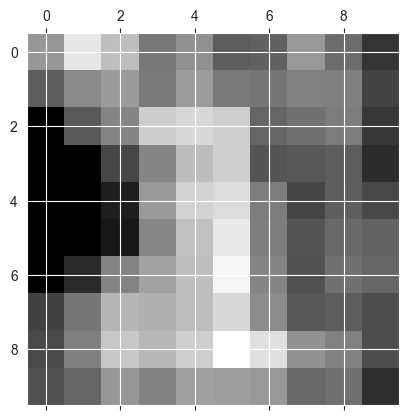

In [69]:
### get the name from the cell above
last_layer = "conv2d_54"
last_deep_layer = "dense_21"
img_path1 = "Data/chest_xray/test/NORMAL/IM-0022-0001.jpeg"
im = cv2.imread(img_path1, 0)
img_size = (150, 150)
im = cv2.resize(im, dsize=img_size)
plt.imshow(im, cmap='gray')
plt.show()
img_array = tf.expand_dims(im, axis=-1)
img_array = tf.divide(img_array, 255)
img_array = tf.reshape(img_array, [1, 150, 150, 1])

heatmap1 = make_gradcam_heatmap(img_array, model, last_layer, last_deep_layer)
plt.matshow(heatmap1, cmap='gray')
plt.show()

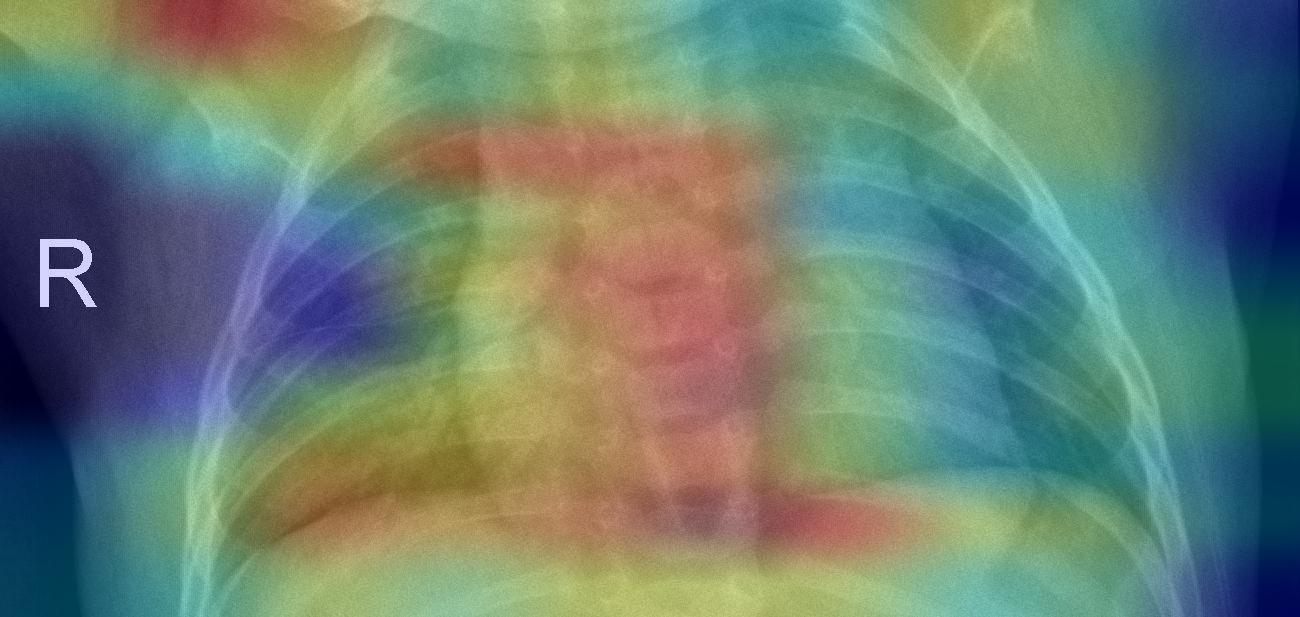

In [70]:
save_and_display_gradcam(img_path1, heatmap1)

In [71]:
def overlay_gradcam(img, heatmap, alpha=0.4):
    # Resize heatmap to match the image size
    heatmap = tf.image.resize(heatmap[..., tf.newaxis], (img.shape[0], img.shape[1])).numpy()
    heatmap = np.squeeze(heatmap)
    heatmap = np.uint8(255 * heatmap)  # Normalize to 0-255
    heatmap = plt.cm.jet(heatmap)[:, :, :3]  # Apply colormap
    
    # Combine original image with heatmap
    overlay = (1 - alpha) * img + alpha * heatmap
    return np.clip(overlay, 0, 1)  # Ensure values are in [0, 1]

C:\Users\popar\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_230']]
Received: inputs=Tensor(shape=(1, 150, 150, 1))
  warnings.warn(msg)


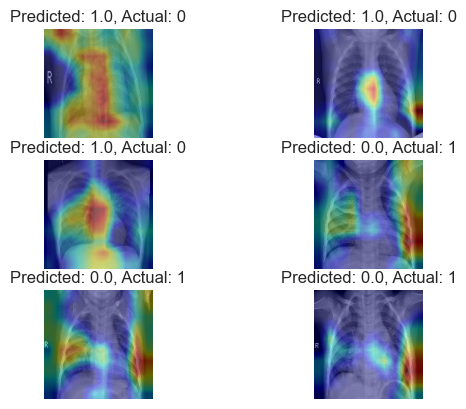

In [72]:
for i, idx in enumerate(incorrect[:3]):
        # Get Grad-CAM heatmap
        img = x_test[idx]
        img_array = np.expand_dims(img, axis=0)  # Add batch dimension
        heatmap = make_gradcam_heatmap(img_array, model, last_layer, last_deep_layer)
        # Overlay Grad-CAM on the original image
        overlay_img = overlay_gradcam(img, heatmap)
        # Plot the image
        plt.subplot(3, 2, i + 1)
        plt.imshow(overlay_img)
        plt.title(f"Predicted: {preds[idx]}, Actual: {y_test[idx]}")
        plt.axis('off')
for i, idx in enumerate(incorrect[-3:]):
        # Get Grad-CAM heatmap
        img = x_test[idx]
        img_array = np.expand_dims(img, axis=0)  # Add batch dimension
        heatmap = make_gradcam_heatmap(img_array, model, last_layer, last_deep_layer)
        # Overlay Grad-CAM on the original image
        overlay_img = overlay_gradcam(img, heatmap)
        # Plot the image
        plt.subplot(3, 2, i + 4)
        plt.imshow(overlay_img)
        plt.title(f"Predicted: {preds[idx]}, Actual: {y_test[idx]}")
        plt.axis('off')